# Rating vs Helpful plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read pickle data with 4 columns: idemID (asin), helpful, rating (overall), reviewerID.


Currently reading items with atleast 5 helpfulness votes

In [2]:
df = pd.read_pickle('data/data_frames/Cell_Phones_and_Accessories_5.pkl')

To include reviews with more than 10 helpfulness scores


In [3]:
df = df.drop(['index'], axis = 1)
num_reviews = df.shape[0]
min_helpfull_review = 10
helpfulness = df['helpful']
temp = [i for i in range(num_reviews)  if helpfulness[i][1] > min_helpfull_review]
df_temp = df.iloc[temp].reset_index()
df = df_temp

In [4]:
df.shape

(4766, 5)

In [5]:
array = df.values #converted to array for faster parsing through data

In [6]:
num_reviews = array.shape[0]
num_reviews

4766

In [7]:
def plot_items(X_all, y_all, is_absolute = False, title = -1):
    df_temp = pd.DataFrame({'y': y_all, 'X': X_all})
    uni_x = df_temp['X'].unique()
    print(uni_x)
    y2 = []
    e = []
    e_lower = []
    frac_of_total_data = 0.001 * df_temp.shape[0]
    less_item_xvals = []
    less_item_yvals = []
    for uni in uni_x:
        df_temp_y = df_temp.loc[df_temp['X'] == uni]['y']
        y2.append(df_temp_y.median())
        e.append(df_temp_y.quantile(0.66) - df_temp_y.median())
        e_lower.append(df_temp_y.median() - df_temp_y.quantile(0.33))
        if df_temp_y.shape[0] < frac_of_total_data:
            less_item_xvals.append(uni)
            less_item_yvals.append(df_temp_y.median())
    y3 = [x for _,x in sorted(zip(uni_x, y2))] # e2 sorted according to y
    e2 = [x for _,x in sorted(zip(uni_x, e))]
    e_lower2 = [x for _,x in sorted(zip(uni_x, e_lower))]
    x2 = sorted(uni_x)
    if is_absolute:
        plt.xlim(-1, 5)
    else:
        plt.xlim(-5, 5)
    plt.ylim(0, 1)
    plt.xlabel("Signed Deviation")
    if (is_absolute):
        plt.xlabel("Absolute deviation")
    plt.ylabel("Helpfulness ratio")
    print (uni)
    if title is not -1:
        plt.title("Plot for variance = " + str(title))
    ecolor = ['black'] * 9
#     ecolor += ['black'] * 3
    plt.errorbar(x2, y3, (e_lower2, e2), fmt='-+', capsize=5, ecolor='black')
    plt.scatter(less_item_xvals, less_item_yvals, color='red')
    print (less_item_xvals, less_item_yvals)
    
    #Uncomment below lines to save figures
#     if title is -1:
#         if is_absolute:
#             plt.savefig("plots/unsigned.png")
#         else:
#             plt.savefig("plots/signed.png")
#     else:
#         if is_absolute:
#             plt.savefig("plots/unsigned_" + str(title) + ".png")
#         else:
#             plt.savefig("plots/signed_" + str(title) + ".png")
#     plt.close()
    plt.show()

In [8]:
def gen_data_points(array, num_reviews_evaluate, is_absolute=False, max_no_of_items = 100):
    item = array[0][1]
    prev_item = 'null'
    count = 0
    X_all = []
    y_all = []
    X_var = [[], [], [], [], [], [], [], [], []]
    y_var = [[], [], [], [], [], [], [], [], []]
    num_items = 0
    num_var_item = [0] * 9
    y = []
    sum = 0
    item_array = np.array([])
    num_accept_items = 0
    num_modified_items = 0
    for i in range(num_reviews_evaluate):
        count = count + 1
        if (count % 10000 == 0):
            print (count)
        curr_item = array[i]
        item = curr_item[1]
        if (prev_item == item):
            item_array = np.append(item_array, curr_item[3])
            sum += curr_item[3]
            y.append(curr_item[2][0] / curr_item[2][1])
            if (count == num_reviews_evaluate):
                if (item_array.size < max_no_of_items):
                    mean = np.mean(item_array)
                    variance = (round(np.var(item_array) * 2)) / 2
                    if (is_absolute):
                        item_array = np.abs(np.rint((item_array - mean) * 2)) / 2
                    else:    
                        item_array = np.rint((item_array - mean) * 2) / 2
                    if (variance <= 4):
                        index = int(2 * variance)
                        X_var[index] += item_array.tolist()
                        y_var[index] += y
                        num_var_item[index] += 1
                    X_all = X_all + item_array.tolist()
                    y_all = y_all + y
                    num_accept_items += 1
                else:
                    item_array = item_array[0:max_no_of_items]
                    y = y[max_no_of_items]
                    mean = np.mean(item_array)
                    variance = (round(np.var(item_array) * 2)) / 2 #round to nearest haf integer
                    if (is_absolute):
                        item_array = np.abs(np.rint((item_array - mean) * 2)) / 2
                    else:    
                        item_array = np.rint((item_array - mean) * 2) / 2
                    if (variance <= 4):
                        index = int(2 * variance)
                        X_var[index] += item_array.tolist()
                        y_var[index] += y
                        num_var_item[index] += 1
                    
                    X_all = X_all + item_array.tolist()
                    y_all = y_all + y
                    num_modified_items += 1
        else:
            if (num_items):
                if (item_array.size < max_no_of_items):
                    mean = np.mean(item_array)
                    variance = (round(np.var(item_array) * 2)) / 2 #round to nearest haf integer
                    if (is_absolute):
                        item_array = np.abs(np.rint((item_array - mean) * 2)) / 2
                    else:    
                        item_array = np.rint((item_array - mean) * 2) / 2
                    if (variance <= 4):
                        index = int(2 * variance)
                        X_var[index] += item_array.tolist()
                        y_var[index] += y
                        num_var_item[index] += 1
                    
                    X_all = X_all + item_array.tolist()
                    y_all = y_all + y
                    num_accept_items += 1
                else:
                    item_array = item_array[0:max_no_of_items]
                    y = y[0:max_no_of_items]
                    mean = np.mean(item_array)
                    variance = (round(np.var(item_array) * 2)) / 2 #round to nearest haf integer
                    if (is_absolute):
                        item_array = np.abs(np.rint((item_array - mean) * 2)) / 2
                    else:    
                        item_array = np.rint((item_array - mean) * 2) / 2
                    if (variance <= 4):
                        index = int(2 * variance)
                        X_var[index] += item_array.tolist()
                        y_var[index] += y
                        num_var_item[index] += 1
                    
                    X_all = X_all + item_array.tolist()
                    y_all = y_all + y
                    num_modified_items += 1
            num_items += 1
            sum = 0
            y = []
            item_array = np.array([])
            prev_item = item
            item_array = np.append(item_array, curr_item[3])
            sum += curr_item[0]
            y.append(curr_item[2][0] / curr_item[2][1])

    print ("Total reviews: ", count)
    print ("Total items: ", num_items)
    print ("Accepted Items: ", num_accept_items)
    print ("Modified Items: ", num_modified_items)
    print ("Number of items with given vairance: ", num_var_item)
    return X_all, y_all, X_var, y_var

In [9]:
X_all, y_all, X_var, y_var = gen_data_points(array, num_reviews)

# plot_items(X_var, y_var)

Total reviews:  4766
Total items:  2738
Accepted Items:  2737
Modified Items:  0
Number of items with given vairance:  [2215, 58, 126, 31, 111, 31, 59, 39, 67]


[ 0.   0.5 -1.5  1.5 -1.   1.   2.5 -0.5 -2.  -2.5  2.  -3.  -3.5  3. ]
3.0
[-3.5, 3.0] [0.27906976744186046, 0.6666666666666666]


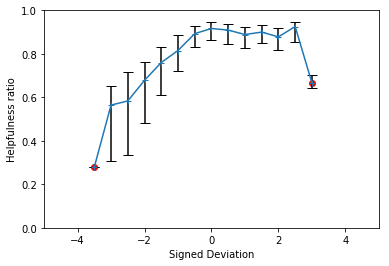

In [10]:
plot_items(X_all, y_all)

In [11]:
X_abs = [abs(i) for i in X_all]

[0.  0.5 1.5 1.  2.5 2.  3.  3.5]
3.5
[3.5] [0.27906976744186046]


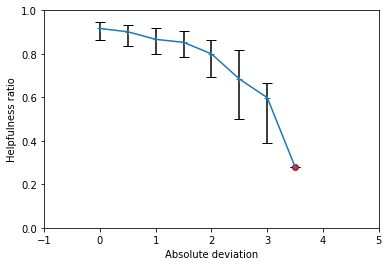

In [12]:
plot_items(X_abs, y_all, is_absolute=True)

[ 0.   0.5 -0.5 -1. ]
-1.0
[] []


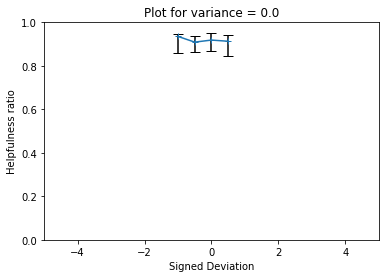

[ 0.  -1.   1.  -1.5  0.5 -0.5 -2.5]
-2.5
[] []


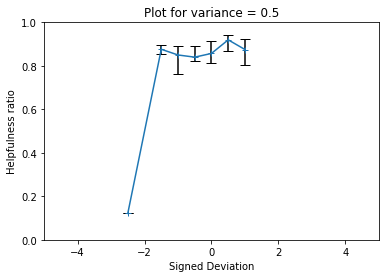

[-1.   1.  -1.5  0.5  1.5 -0.5  0.  -2.   2.  -2.5]
-2.5
[] []


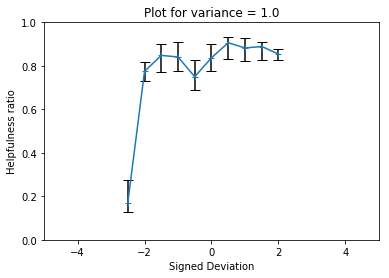

[ 0.5 -1.5  1.5 -2.   1.  -0.  -0.5 -2.5 -3.  -1.   2.  -3.5]
-3.5
[] []


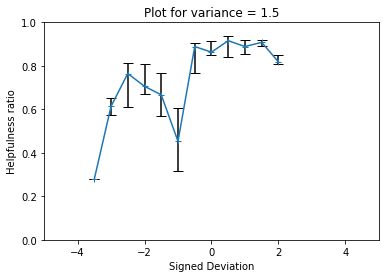

[ 0.5 -2.5  1.5 -1.5 -0.5  1.  -2.   2.  -0.  -3.  -1.   2.5  3. ]
3.0
[] []


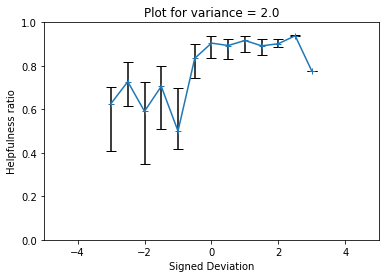

[ 1.  -2.  -1.   2.   0.   1.5 -1.5 -0.5  2.5  0.5 -2.5 -3. ]
-3.0
[] []


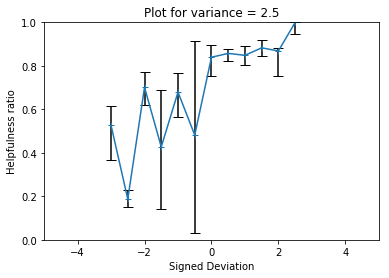

[-2.5  0.5  1.5  2.5 -0.5 -1.5  0.   2.   1.  -2.  -3.  -1.   3. ]
3.0
[] []


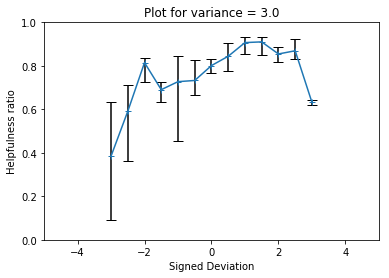

[-1.5  2.5 -2.   2.   1.   1.5 -2.5 -1.  -3. ]
-3.0
[] []


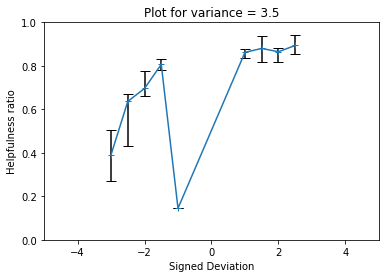

[-2.   2.   1.5 -2.5  2.5 -1.5]
-1.5
[] []


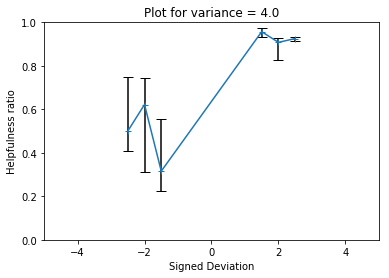

In [13]:
for i in range (9):
    plot_items(X_var[i], y_var[i], title = i/2)

In [18]:
#to save data points if files are very large
with open('plots/xall.txt', 'w') as thefile:
    for item in X_all:
        thefile.write('%s\n' % item)
with open('plots/yall.txt', 'w') as thefile:
    for item in y_all:
        thefile.write('%s\n' % item)